# Importando todas as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analisando o grupo de dados: <a href="http://dados.ufrn.br/group/ensino" traget="_black">http://dados.ufrn.br/group/ensino</a>

In [2]:
# avaliações dos docentes - http://dados.ufrn.br/dataset/avaliacoes-de-docencia
avaliacoes_url = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
avaliacoes = pd.read_csv(avaliacoes_url, sep=';')

# componentes curriculares presenciais - http://dados.ufrn.br/dataset/componentes-curriculares
disciplinas_url = 'http://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv'
disciplinas = pd.read_csv(disciplinas_url, sep=';', usecols=['id_componente','codigo','nivel','nome','unidade_responsavel'])

In [3]:
# matrículas em componentes - http://dados.ufrn.br/dataset/matriculas-componentes

def getNotas(notas, url):
    return pd.concat([notas, pd.read_csv(url, sep=';', usecols=['id_turma','discente','media_final','descricao'])])

# matrículas em componentes em 2017.1
notas = getNotas(None, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171')

# matrículas em componentes em 2016.2
notas = getNotas(notas, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv')

# matrículas em componentes em 2016.1
notas = getNotas(notas, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv')

# matrículas em componentes em 2015.2
notas = getNotas(notas, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/baa6c8b4-2072-417f-b238-c028ccc8c14b/download/matriculas-de-2015.2.csv')

# matrículas em componentes em 2015.1
notas = getNotas(notas, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9e7ba1c2-f92d-4b9c-9e91-3b026ecdf913/download/matriculas-de-2015.1.csv')

# matrículas em componentes em 2014.2
notas = getNotas(notas, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/e974792c-b557-470c-bf3d-ede7d5b5e6a6/download/matricula-componente-20142.csv')

# matrículas em componentes em 2014.1
notas = getNotas(notas, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/7081446d-39f9-4374-ad0b-86ecab97e569/download/matricula-componente-20141.csv')

# matrículas em componentes em 2013.2
notas = getNotas(notas, 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/517ed5f6-f8a2-40fd-826b-6ed3388f6e88/download/matricula-componente-20132.csv')

In [4]:
# turmas - http://dados.ufrn.br/dataset/turmas

def getTurmas(turmas, url):
    return pd.concat([turmas, pd.read_csv(url, sep=';', usecols=['id_turma','id_componente_curricular'])])

# turmas de 2017.1
turmas = getTurmas(None, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e77d066-d506-45eb-a21e-76aa79616fef/download/turmas-2017.1')

# turmas de 2016.2
turmas = getTurmas(turmas, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e8e3228-7f22-40a2-9efd-561c44844567/download/turmas-2016.2.csv')

# turmas de 2016.1
turmas = getTurmas(turmas, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/322d9977-ba15-47f1-8216-75a1ca78e197/download/turmas-2016.1.csv')

# turmas de 2015.1
turmas = getTurmas(turmas, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/4d5aee5a-00b0-4ed6-a4be-59fa77a56797/download/turmas-2015.1.csv')

# turmas de 2015.2
turmas = getTurmas(turmas, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/7c59621c-4a8b-49d4-b319-83cfea9bdf28/download/turmas-2015.2.csv')

# turmas de 2014.2
turmas = getTurmas(turmas, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/2c69547b-920f-4ec2-92c0-3fbc19512165/download/turmas-2014.2.csv')

# turmas de 2014.1
turmas = getTurmas(turmas, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/e6e4144f-4042-4fdc-84e0-76e9ec27ae7c/download/turmas-2014.1.csv')

# turmas de 2013.2
turmas = getTurmas(turmas, 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/e7e3cf12-a29b-491a-a895-021a43819197/download/turmas-2013.2.csv')

# Preparação e Limpeza dos Dados

In [5]:
# removendo disciplinas repetidas, dados errados e ajustando tipo da coluna para a junção
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.str.contains(' ')]
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]
disciplinas.id_componente = disciplinas.id_componente.astype(np.int64)

In [6]:
# removendo discentes(matriculas) que não realizam avaliações
notas = notas[notas.descricao != 'CANCELADO']
notas = notas[notas.descricao != 'CUMPRIU']
notas = notas[notas.descricao != 'DISPENSADO']
notas = notas[notas.descricao != 'DESISTENCIA']
notas = notas[notas.descricao != 'MATRICULADO']
notas = notas[notas.descricao != 'TRANCADO']
notas = notas[notas.descricao != 'EXCLUIDA']

# removendo notas nulas ou repetidas
notas = notas[notas.media_final.notnull()]
notas = notas[~notas[['discente','id_turma']].duplicated()]

# unificando em aprovados e reprovados
notas.loc[notas.descricao == 'APROVADO POR NOTA', 'descricao'] = 'APROVADO'
notas.loc[notas.descricao == 'REPROVADO POR MÉDIA E POR FALTAS', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA E FALTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR FALTAS', 'descricao'] = 'REPROVADO'

In [7]:
# renomeando e ajustando o tipo da coluna para a junção
turmas.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas = turmas[turmas.id_componente.notna()]
turmas.id_componente = turmas.id_componente.astype(np.int64)

In [8]:
# Juntando as avaliações, as turmas e as disciplinas
avaliacoes = pd.merge(avaliacoes, pd.merge(turmas, disciplinas, on='id_componente'), on='id_turma')

# removendo as duplicações geradas
avaliacoes = avaliacoes[~avaliacoes.duplicated()]

# limitando avaliações de docentes do IMD
avaliacoes = avaliacoes[avaliacoes.unidade_responsavel == 'INSTITUTO METROPOLE DIGITAL']

## Calcular dados das avaliações dos professores

In [28]:
# criando as colunas e gerando seus valores
avaliacoes['media_discentes'] = 0
avaliacoes['nota_min'] = 0
avaliacoes['nota_max'] = 0
avaliacoes['nota_med'] = 0
avaliacoes['percentual_aprovados'] = 0

for turma in avaliacoes.id_turma:
    discentes = notas[notas.id_turma == turma]
    if(len(discentes) == 0):
        continue
    avaliacoes.loc[avaliacoes.id_turma == turma,'media_discentes'] = discentes.media_final.sum() / len(discentes)
    avaliacoes.loc[avaliacoes.id_turma == turma,'nota_min'] = discentes.media_final.min()
    avaliacoes.loc[avaliacoes.id_turma == turma,'nota_max'] = discentes.media_final.max()
    avaliacoes.loc[avaliacoes.id_turma == turma,'nota_med'] = discentes.media_final.median()
    avaliacoes.loc[avaliacoes.id_turma == turma,
                   'percentual_aprovados'] = len(discentes[discentes.descricao == 'APROVADO']) * 100 / len(discentes)

avaliacoes

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,...,id_componente,codigo,nivel,nome,unidade_responsavel,media_discentes,nota_min,nota_max,nota_med,percentual_aprovados
61554,22739,MANOEL VERAS DE SOUSA NETO,1239563,2015,1,26,9.53,1.28,9.45,1.16,...,52685,IMD0405,G,FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,5.426923,0.0,7.9,5.90,84.615385
61556,5752589,JOSUÉ VITOR DE MEDEIROS JÚNIOR,1239563,2015,1,26,9.74,0.96,9.59,1.02,...,52685,IMD0405,G,FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,5.426923,0.0,7.9,5.90,84.615385
61560,22739,MANOEL VERAS DE SOUSA NETO,57565062,2015,2,7,8.40,2.07,8.60,2.17,...,52681,IMD0411,G,INTRODUÇÃO À GOVERNANÇA E GESTÃO DE TI,INSTITUTO METROPOLE DIGITAL,7.114286,5.0,9.7,6.90,100.000000
61562,5752589,JOSUÉ VITOR DE MEDEIROS JÚNIOR,57565062,2015,2,7,9.70,0.67,9.20,1.74,...,52681,IMD0411,G,INTRODUÇÃO À GOVERNANÇA E GESTÃO DE TI,INSTITUTO METROPOLE DIGITAL,7.114286,5.0,9.7,6.90,100.000000
85410,23713,ELIZABETH FERREIRA GOUVEA GOLDBARG,1217953,2014,1,9,10.00,0.00,9.89,0.49,...,52787,IMD0032,G,ESTRUTURAS DE DADOS BÁSICAS II,INSTITUTO METROPOLE DIGITAL,4.366667,0.9,7.1,5.10,55.555556
89015,24798,REGIVAN HUGO NUNES SANTIAGO,1211543,2013,2,42,9.40,1.29,7.80,2.74,...,52659,IMD0023,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO,INSTITUTO METROPOLE DIGITAL,4.219048,0.5,8.8,3.75,35.714286
89020,24798,REGIVAN HUGO NUNES SANTIAGO,1217967,2014,1,29,9.09,1.71,7.80,2.93,...,55025,IMD0038,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,INSTITUTO METROPOLE DIGITAL,3.600000,0.0,7.5,4.10,34.482759
89021,24798,REGIVAN HUGO NUNES SANTIAGO,1239541,2015,1,36,9.13,1.27,7.34,3.02,...,55025,IMD0038,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,INSTITUTO METROPOLE DIGITAL,3.897222,0.0,8.7,5.00,55.555556
89026,24798,REGIVAN HUGO NUNES SANTIAGO,57564855,2015,2,22,9.33,1.71,8.38,2.74,...,55025,IMD0038,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,INSTITUTO METROPOLE DIGITAL,2.359091,0.0,7.3,0.80,36.363636
89027,24798,REGIVAN HUGO NUNES SANTIAGO,57579587,2016,1,25,9.63,0.65,8.09,3.18,...,55025,IMD0038,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,INSTITUTO METROPOLE DIGITAL,3.732000,0.0,10.0,3.80,44.000000


## Análise Grafica dos dados

In [100]:
# Criando função para exibir gráfico
# recebe como parâmetro uma as avaliações filtradas
def showGrafic(a):
    # Criando e personalizando o gráfico
    ax = plt.figure(figsize=(14, 7)).add_subplot(1, 1, 1)
    
    x = range(len(a))
    ax.plot(x, a.atuacao_profissional_media, color='#333333', linewidth=4, label='Atuação do docente')
    ax.plot(x, a.postura_profissional_media, linewidth=4, label='Postura do docente')
    ax.plot(x, a.media_discentes, linewidth=4, label='Média dos Discentes')
    ax.bar(x, a.percentual_aprovados/10, alpha=0.5, color='#cccccc', width=0.5, label='Percentual de aprovados')
    
    xlabel = []
    for aux in x:
        xlabel.append(f'{np.asarray(a.ano)[aux]}.{np.asarray(a.periodo)[aux]}')
    plt.xticks(x, xlabel, rotation='vertical')
    ax.legend(loc='lower left', fontsize='x-large')
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_title(f'{len(x)} turmas de {a.nome.unique()[0]}')
    for d in ['top','bottom','left','right']:
        ax.spines[d].set_visible(False)
    
    plt.show()

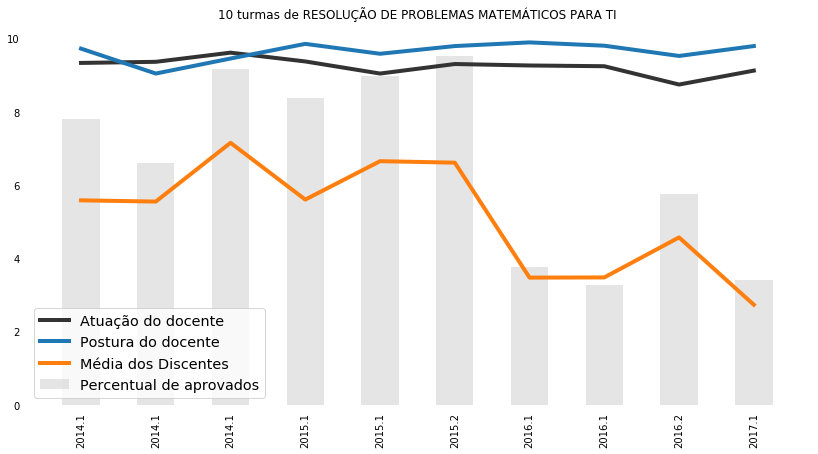

In [101]:
# Restringindo dados de um professor e uma disciplina para o gráfico
a = avaliacoes[avaliacoes.codigo == 'IMD0019']
a = a[a.id_docente == 5756386].sort_values(['ano', 'periodo'])

showGrafic(a)

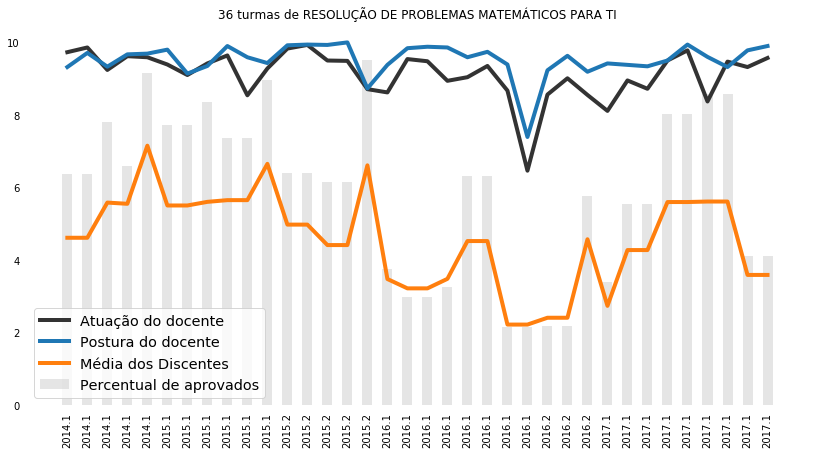

In [103]:
# Restringindo dados para professores diferente do citado acima e com a memsa disciplina para o gráfico
a = avaliacoes[avaliacoes.codigo == 'IMD0019']
a = a[a.id_docente != 5756386].sort_values(['ano', 'periodo'])

showGrafic(a)

## Análise secundária e mais geral

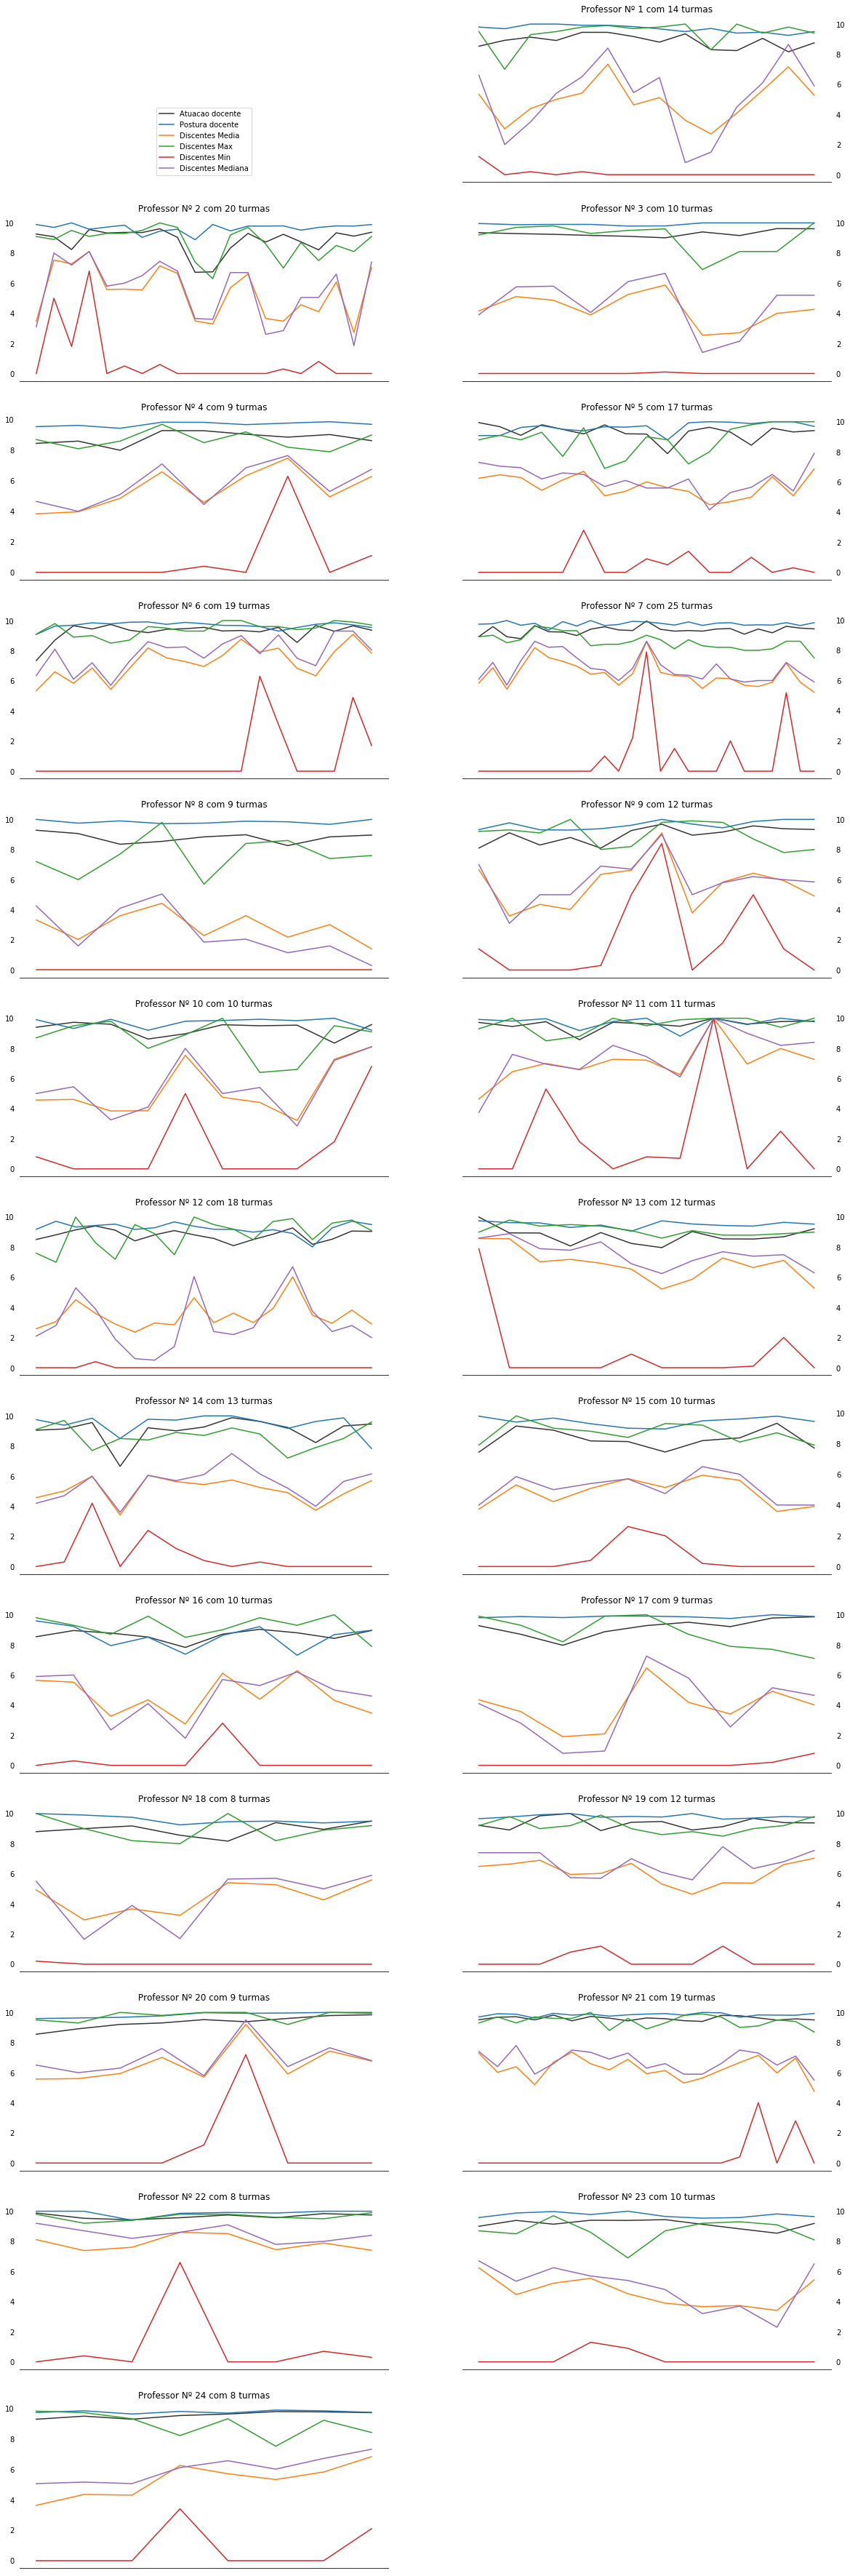

In [108]:
# Listando em cada gráfico todas as turmas(independente das disciplinas) de cada determinado professor

fig = plt.figure(figsize=(20, 150))
ax = fig.add_subplot(20, 2, 1)
ax.plot([], [], label='Atuacao docente', color='#333333')
ax.plot([], [], label='Postura docente')
ax.plot([], [], label='Discentes Media')
ax.plot([], [], label='Discentes Max')
ax.plot([], [], label='Discentes Min')
ax.plot([], [], label='Discentes Mediana')
ax.legend(loc='center')
ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
for d in ['top','bottom','left','right']:
    ax.spines[d].set_visible(False)

i = 1
for docente in avaliacoes.id_docente.unique():
    a = avaliacoes[avaliacoes.id_docente == docente]
    x = range(len(a))
    if(len(x) < 8):
        continue
    i += 1
    ax = fig.add_subplot(30, 2, i)
    ax.plot(x, a.atuacao_profissional_media, color='#333333')
    ax.plot(x, a.postura_profissional_media)
    ax.plot(x, a.media_discentes)
    ax.plot(x, a.nota_max)
    ax.plot(x, a.nota_min)
    ax.plot(x, a.nota_med)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=i%2, labelright=~i%2)
    ax.set_title(f'Professor Nº {i-1} com {len(x)} turmas')
    for d in ['top','left','right']:
        ax.spines[d].set_visible(False)

plt.show()